# Embedding Space
---

In [1]:
import sys
sys.path.append('../')

In [2]:
from cross_lingual.datasets.utils import get_dataloader, mask_tokens

In [3]:
import torch
import numpy as np
from tqdm.auto import tqdm
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
from transformers import (
    BertTokenizer,
    BertForMaskedLM,
)

## Load Models

In [5]:
device = "cpu"
batch_size = 4
data_dir = Path("../data/")
cache_dir = Path("../cache/")
max_grad_norm = 1.0

In [6]:
mbert = BertForMaskedLM.from_pretrained('bert-base-multilingual-cased', cache_dir=cache_dir)
mtokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', cache_dir=cache_dir)

In [20]:
dbert = BertForMaskedLM.from_pretrained('bert-base-dutch-cased', cache_dir=cache_dir)
dtokenizer = BertTokenizer.from_pretrained('bert-base-dutch-cased', cache_dir=cache_dir)

## Validate BERTje 

In [21]:
valid_dl = get_dataloader(data_dir / "valid.txt", dtokenizer, 10)

In [24]:
losses = []
with torch.no_grad():
    for i, batch in enumerate(valid_dl):
        inputs, labels = mask_tokens(batch, dtokenizer)
        outputs = dbert(inputs, masked_lm_labels=labels)
        losses.append(outputs[0])
        if i>100: break

In [27]:
loss = np.mean(losses[:50])
perplexity = np.exp(loss)
perplexity

2.8932354

## Embedding Space

In [8]:
mbert.bert.embeddings.word_embeddings.weight.shape

torch.Size([119547, 768])

In [9]:
len(mtokenizer.vocab)

119547

In [10]:
dbert.bert.embeddings.word_embeddings.weight.shape

torch.Size([30000, 768])

In [11]:
len(dtokenizer.vocab)

30000

In [31]:
du_word = 'kamp'
en_word = 'camp'
mtokenizer.tokenize(en_word), mtokenizer.tokenize(du_word), dtokenizer.tokenize(du_word)

(['camp'], ['kamp'], ['kamp'])

In [32]:
mtokenizer.vocab[en_word], mtokenizer.vocab[du_word], dtokenizer.vocab[du_word]

(16700, 28371, 14066)

In [43]:
embeds = [
    mbert.bert.embeddings.word_embeddings.weight[16700].detach().numpy(),
    mbert.bert.embeddings.word_embeddings.weight[28371].detach().numpy(),
    dbert.bert.embeddings.word_embeddings.weight[14066].detach().numpy()
]

In [44]:
embeds = np.vstack(embeds)

In [45]:
embeds.shape

(3, 768)

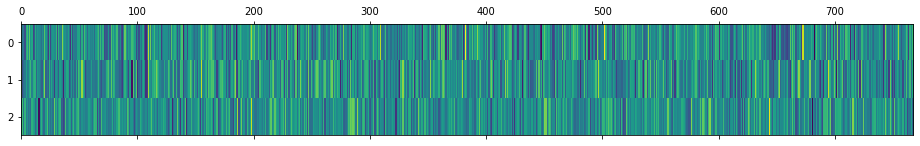

In [48]:
plt.matshow(embeds, aspect='auto')